# Introducing Copulas

## Imports

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (16, 5)

## Global Parameters

In [3]:
np.random.seed(seed=5)
sample_size = 1000
joint_plot_height = 7

## Bivariate normal - What we all do using correlation

### Define Distribution Parameters

In [4]:
mean = np.array([0, 0])
rho = 0.8

cov = [[1, rho], # diagonal covariance, points lie on x or y-axis
       [rho, 1]
      ] 

### Sample 1000 draws from the multivariate normal

In [5]:
multivariate_normal_sample = np.random.multivariate_normal(mean, cov, sample_size)
norm_1, norm_2 = multivariate_normal_sample.T

### Compute CDF

In [6]:
multivariate_uniform_sample = stats.norm.cdf(multivariate_normal_sample, loc=mean)
unif_1, unif_2 = multivariate_uniform_sample.T

### Compute Correlation Coefficient

In [7]:
np.corrcoef(multivariate_uniform_sample, rowvar=False)

array([[1.        , 0.79332134],
       [0.79332134, 1.        ]])

### Plot Joint Distribution

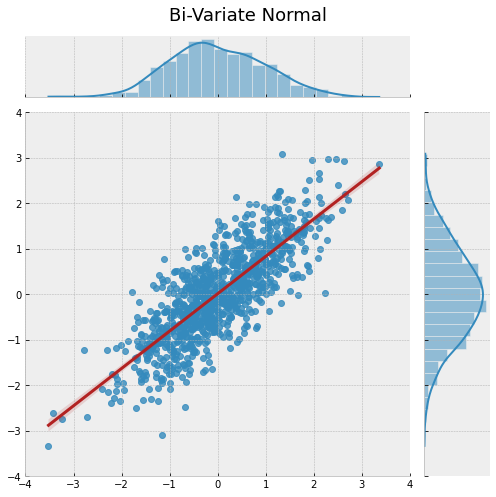

In [8]:
joint_grid = sns.jointplot(x=norm_1, y=norm_2, kind="reg", height=joint_plot_height, xlim=(-4, 4), ylim=(-4, 4),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Bi-Variate Normal", fontsize=18)
plt.tight_layout()

## Time vs Money in E-Commerce

We will use a Copula here, which allows us to use time series with different distributions. An example of this would be trying to work out the correlation between time spent on an E-Commerce, and money spent.

### Generate Synthetic Dataset

In [9]:
website_time = stats.gamma.ppf(unif_1, a=2, scale=5)
website_money = stats.beta.ppf(unif_2, a=0.5, b=0.5, loc=5, scale=100)

### Time spent on website

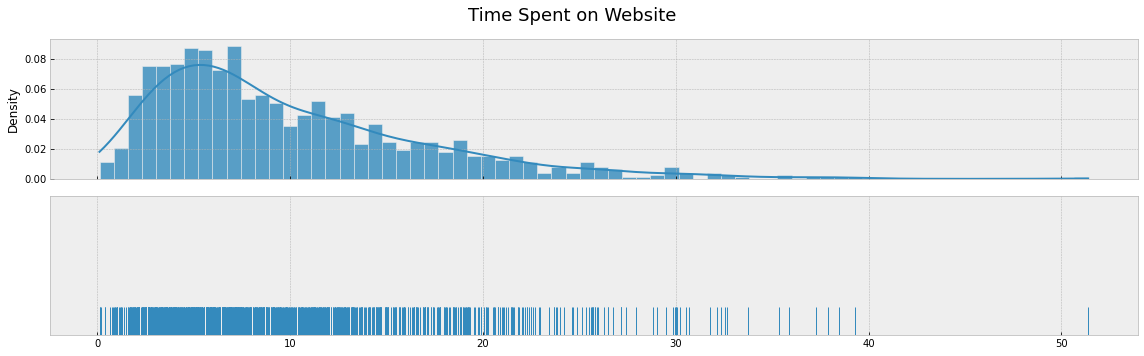

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 5), sharex=True)

ax = axes[0]
sns.histplot(x=website_time, kde=True, stat="density", bins=70, ax=ax, color=(0.20, 0.54, 0.74), alpha=0.8)

ax = axes[1]
sns.rugplot(x=website_time, ax=ax, height=0.2)
ax.set_yticks([])

plt.suptitle("Time Spent on Website", fontsize=18)
plt.tight_layout()

### Dollars spent on website

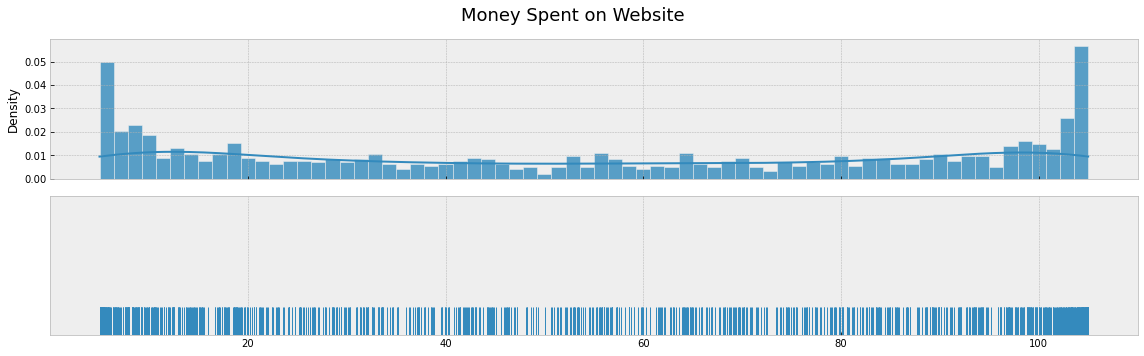

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 5), sharex=True)

ax = axes[0]
sns.histplot(x=website_money, kde=True, stat="density", bins=70, ax=ax, color=(0.20, 0.54, 0.74), alpha=0.8)

ax = axes[1]
sns.rugplot(x=website_money, ax=ax, height=0.2)
ax.set_yticks([])

plt.suptitle("Money Spent on Website", fontsize=18)
plt.tight_layout()

### Scatter plot of time spent on website vs $$ spent

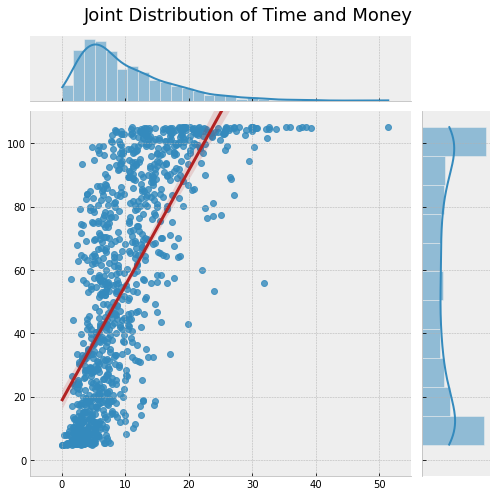

In [12]:
joint_grid = sns.jointplot(x=website_time, y=website_money, kind="reg", height=joint_plot_height, xlim=(-5, 55), ylim=(-5, 110),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Joint Distribution of Time and Money", fontsize=18)
plt.tight_layout()

In [13]:
correlation_coefficient = np.corrcoef([website_time, website_money])[0, -1]
print(f"Corrlation between time and $$ is: {correlation_coefficient:.4f}")

Corrlation between time and $$ is: 0.7231


## Transforming distributions to make our lives easier

### Computing CDFs

In [14]:
website_time_cdf = stats.gamma.cdf(website_time, a=2, scale=5)
website_money_cdf = stats.beta.cdf(website_money, a=0.5, b=0.5, loc=5, scale=100)

### CDFs for Time

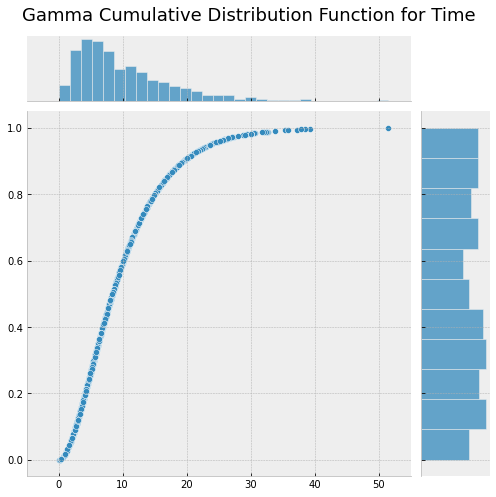

In [15]:
joint_grid = sns.jointplot(x=website_time, y=website_time_cdf, height=joint_plot_height, xlim=(-5, 55), ylim=(-0.05, 1.05))

plt.suptitle("Gamma Cumulative Distribution Function for Time", fontsize=18)
plt.tight_layout()

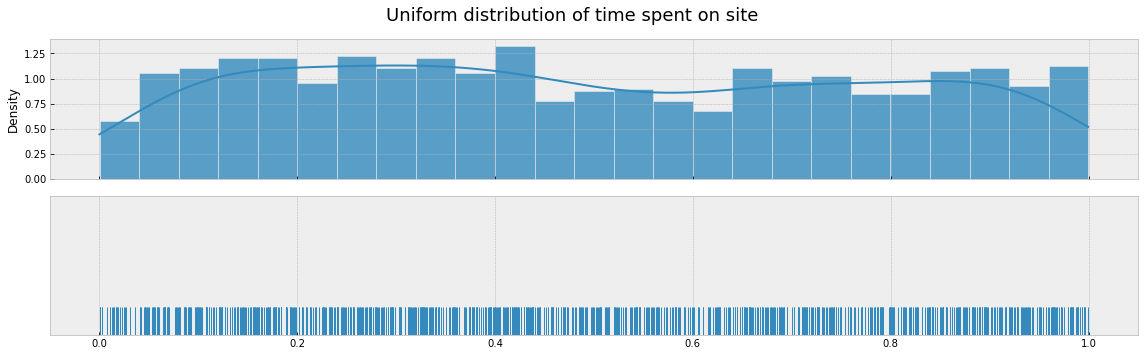

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 5), sharex=True)

ax = axes[0]
sns.histplot(x=website_time_cdf, kde=True, stat="density", bins=25, ax=ax, color=(0.20, 0.54, 0.74), alpha=0.8)

ax = axes[1]
sns.rugplot(x=website_time_cdf, ax=ax, height=0.2)
ax.set_yticks([])

plt.suptitle("Uniform distribution of time spent on site", fontsize=18)
plt.tight_layout()

## Money

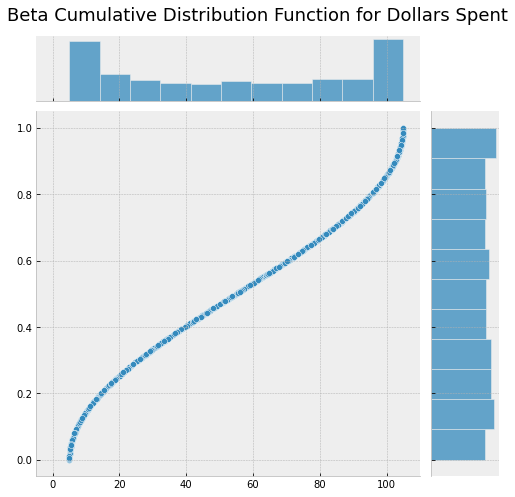

In [17]:
joint_grid = sns.jointplot(x=website_money, y=website_money_cdf, height=joint_plot_height, xlim=(-5, 110), ylim=(-0.05, 1.05))

plt.suptitle("Beta Cumulative Distribution Function for Dollars Spent", fontsize=18)
plt.tight_layout()

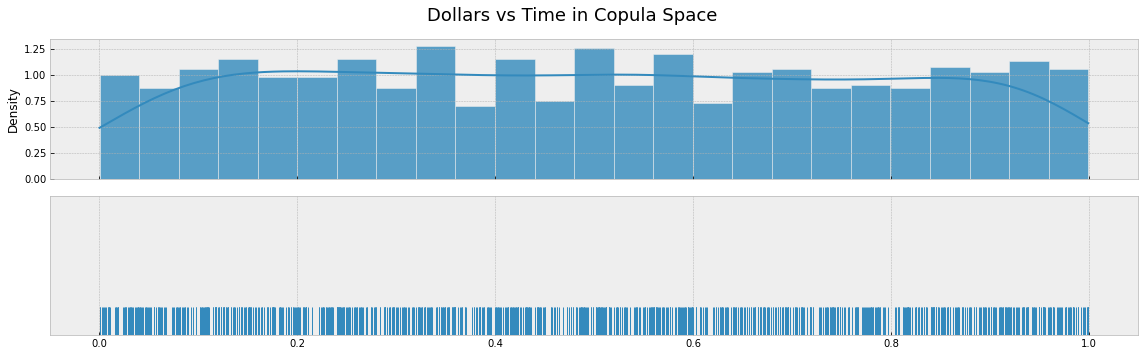

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 5), sharex=True)

ax = axes[0]
sns.histplot(x=website_money_cdf, kde=True, stat="density", bins=25, ax=ax, color=(0.20, 0.54, 0.74), alpha=0.8)

ax = axes[1]
sns.rugplot(x=website_money_cdf, ax=ax, height=0.2)
ax.set_yticks([])

plt.suptitle("Dollars vs Time in Copula Space", fontsize=18)
plt.tight_layout()

## Time vs Money

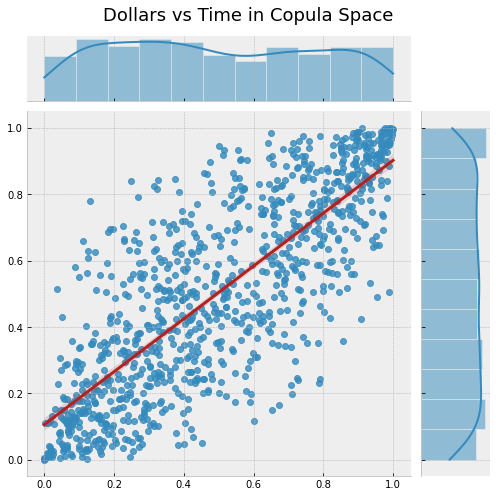

In [19]:
joint_grid = sns.jointplot(x=website_time_cdf, y=website_money_cdf, kind="reg", height=joint_plot_height, xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Dollars vs Time in Copula Space", fontsize=18)
plt.tight_layout()

In [20]:
correlation_coefficient = np.corrcoef([website_time_cdf, website_money_cdf])[0, -1]
print(f"Corrlation between time and $$ is: {correlation_coefficient:.4f}")

Corrlation between time and $$ is: 0.7933


# Examples of popular copulas

<center>
<img width=800 height=800 src="https://media-exp1.licdn.com/dms/image/C4E22AQHzt55oJPIjYg/feedshare-shrink_800/0/1584889451983?e=1628121600&v=beta&t=TsDFMmuqhjDmw0Qe7O1e4PhvQUc9UOyNlMAqSLIVW-s" />
</center>